In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()
from dython import nominal
import warnings 

from dython import nominal

In [2]:
data = pd.read_csv('model_dat.csv')
data

,Brand,Year,Horsepower,Engine Cylinders,Number of Doors,Price
0,BMW,2011,335,6,2,46135
1,BMW,2011,300,6,2,40650
2,BMW,2011,300,6,2,36350
3,BMW,2011,230,6,2,29450
4,BMW,2011,230,6,2,34500
...,...,...,...,...,...,...
9841,Acura,2012,300,6,4,46120
9842,Acura,2012,300,6,4,56670
9843,Acura,2012,300,6,4,50620
9844,Acura,2013,300,6,4,50920


In [3]:
# Treating all the nominal variables at once using dummy variables

data

,Brand,Year,Horsepower,Engine Cylinders,Number of Doors,Price
0,BMW,2011,335,6,2,46135
1,BMW,2011,300,6,2,40650
2,BMW,2011,300,6,2,36350
3,BMW,2011,230,6,2,29450
4,BMW,2011,230,6,2,34500
...,...,...,...,...,...,...
9841,Acura,2012,300,6,4,46120
9842,Acura,2012,300,6,4,56670
9843,Acura,2012,300,6,4,50620
9844,Acura,2013,300,6,4,50920


In [12]:
TargetVariable='Price'
Predictors=['Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors', 'Price',
       'Brand_Acura', 'Brand_Alfa Romeo', 'Brand_Audi', 'Brand_BMW',
       'Brand_Buick', 'Brand_Cadillac', 'Brand_Chevrolet', 'Brand_Chrysler',
       'Brand_Dodge', 'Brand_FIAT', 'Brand_Ford', 'Brand_GMC', 'Brand_Genesis',
       'Brand_HUMMER', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Kia', 'Brand_Land Rover', 'Brand_Lexus', 'Brand_Lincoln',
       'Brand_Lotus', 'Brand_Maserati', 'Brand_Mazda', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Oldsmobile',
       'Brand_Plymouth', 'Brand_Pontiac', 'Brand_Porsche', 'Brand_Saab',
       'Brand_Scion', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo']
data_Numeric=pd.get_dummies(data)
X=data_Numeric[Predictors].values
y=data_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=428)
data_Numeric.columns

Index(['Year', 'Horsepower', 'Engine Cylinders', 'Number of Doors', 'Price',
       'Brand_Acura', 'Brand_Alfa Romeo', 'Brand_Audi', 'Brand_BMW',
       'Brand_Buick', 'Brand_Cadillac', 'Brand_Chevrolet', 'Brand_Chrysler',
       'Brand_Dodge', 'Brand_FIAT', 'Brand_Ford', 'Brand_GMC', 'Brand_Genesis',
       'Brand_HUMMER', 'Brand_Honda', 'Brand_Hyundai', 'Brand_Infiniti',
       'Brand_Kia', 'Brand_Land Rover', 'Brand_Lexus', 'Brand_Lincoln',
       'Brand_Lotus', 'Brand_Maserati', 'Brand_Mazda', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Nissan', 'Brand_Oldsmobile',
       'Brand_Plymouth', 'Brand_Pontiac', 'Brand_Porsche', 'Brand_Saab',
       'Brand_Scion', 'Brand_Subaru', 'Brand_Suzuki', 'Brand_Toyota',
       'Brand_Volkswagen', 'Brand_Volvo'],
      dtype='object')

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

RegModel = DecisionTreeRegressor(max_depth=20)
#RegModel = DecisionTreeClassifier(max_depth = 20)
RegModel.fit(X_train,y_train)
prediction=RegModel.predict(X_train)

[Text(0.49432998033620495, 0.9705882352941176, 'Price <= 30240.0\nsquared_error = 252433203.667\nsamples = 7876\nvalue = 29371.026'),
 Text(0.1790290456284874, 0.9117647058823529, 'Price <= 13015.0\nsquared_error = 96793395.623\nsamples = 4215\nvalue = 17892.642'),
 Text(0.0718217463429347, 0.8529411764705882, 'Price <= 6493.5\nsquared_error = 3517913.251\nsamples = 1108\nvalue = 2757.234'),
 Text(0.05133087015533102, 0.7941176470588235, 'Price <= 2941.5\nsquared_error = 518663.308\nsamples = 1060\nvalue = 2397.301'),
 Text(0.02549342105263158, 0.7352941176470589, 'Price <= 2326.5\nsquared_error = 58361.929\nsamples = 886\nvalue = 2130.686'),
 Text(0.010558833509274619, 0.6764705882352942, 'Price <= 2105.5\nsquared_error = 5405.359\nsamples = 735\nvalue = 2030.793'),
 Text(0.0028936057909817524, 0.6176470588235294, 'Price <= 2033.0\nsquared_error = 304.258\nsamples = 639\nvalue = 2004.463'),
 Text(0.0007540340823405218, 0.5588235294117647, 'Price <= 2013.5\nsquared_error = 3.719\nsampl

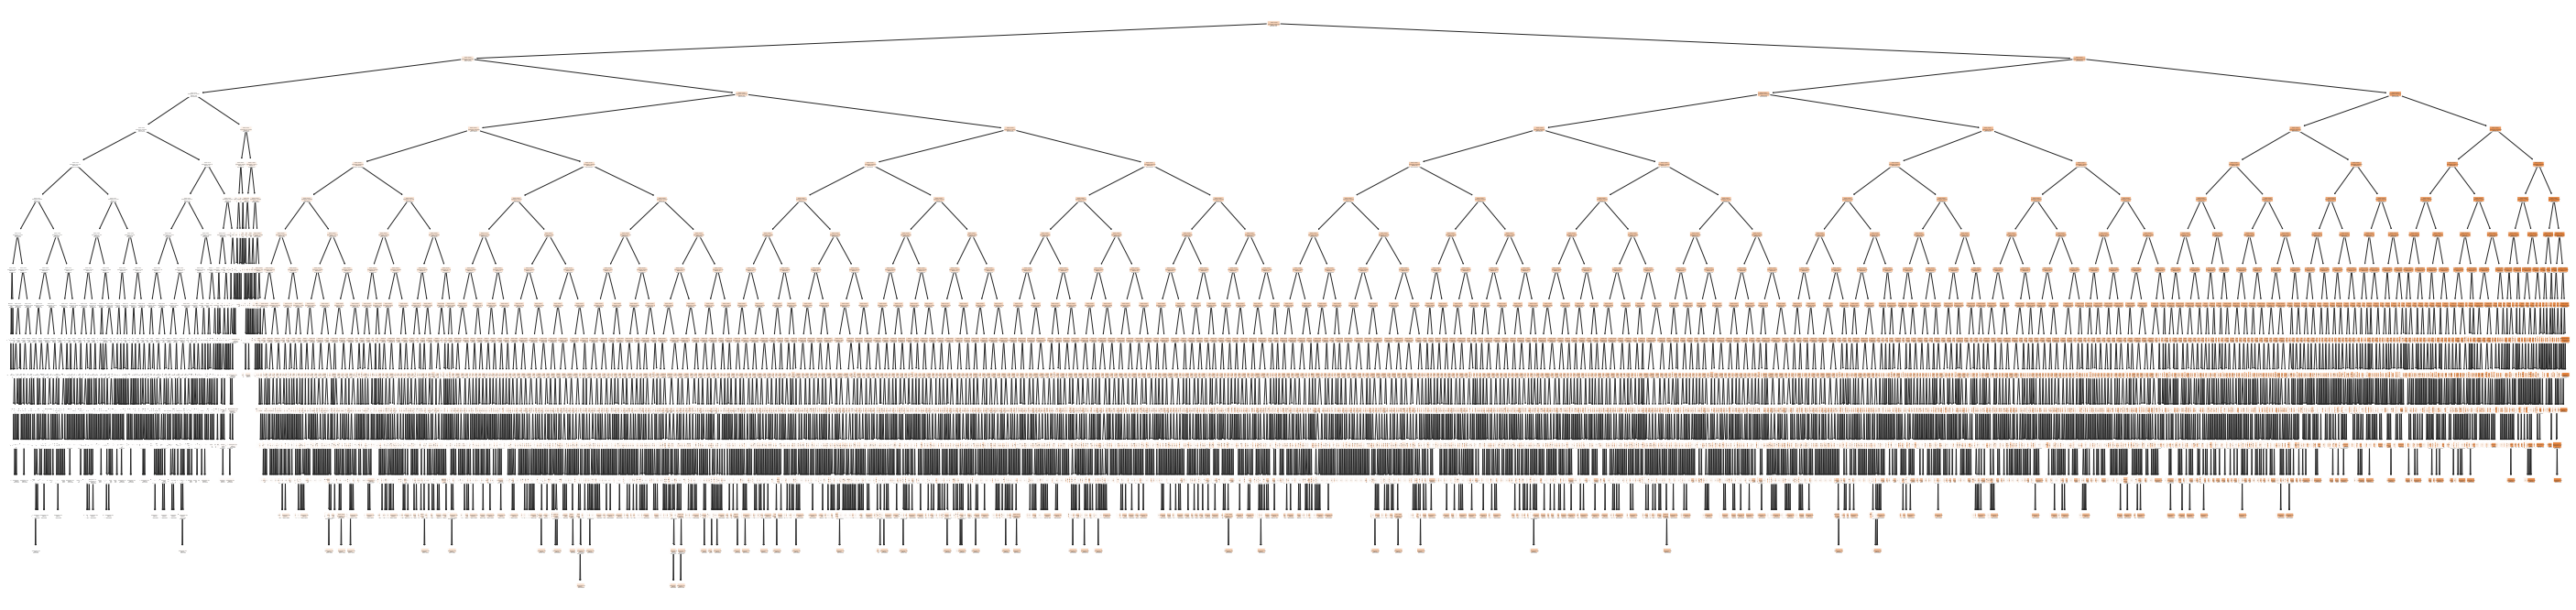

In [23]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(50,12))
plot_tree(RegModel, filled=True, rounded=True, 
          feature_names = Predictors, 
         class_names = TargetVariable)

In [27]:
# Print the Classification Accuracy
print("Classification Accuracy \t:", RegModel.score(X_train, y_train))
print("Classification Accuracy \t:", RegModel.score(X_test, y_test))

Classification Accuracy 	: 1.0
Classification Accuracy 	: 0.9999981364222995
